<a href="https://colab.research.google.com/github/TUMH0404/waka0307/blob/main/20250124sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp

In [ ]:
# サンプルデータ
parameter50 = sp.stats.norm(loc=50,scale=10)
parameter80 = sp.stats.norm(loc=80,scale=10)

dat50 = parameter50.rvs(20).astype(int)
dat80 = parameter80.rvs(20).astype(int)

kde50 = sp.stats.gaussian_kde(dat50)
kd380 = sp.stats.gaussian_kde(dat80)

In [ ]:
# バートレット検定
stat, p_value = sp.stats.bartlett(dat50, dat80)
print(p_value)

0.3609090978806315


In [ ]:
# F検定による2群の分散の比較
var1 = np.var(dat50, ddof=1)
var2 = np.var(dat80, ddof=1)

# F統計量
f_stat = var1 / var2
df1 = len(dat50) - 1  # 自由度1
df2 = len(dat80) - 1  # 自由度2

# p値の計算
p_value = sp.stats.f.cdf(f_stat, df1, df2) if f_stat < 1 else 1 - sp.stats.f.cdf(f_stat, df2, df1)
print(p_value)

0.18048178142372953


In [ ]:
# Levene検定による2つのデータサンプルの分散の等質性検定
stat, p_value = sp.stats.levene(dat50, dat80)
print(p_value)

0.36628803856927883


In [ ]:
# t検定
sp.stats.ttest_ind(dat50,dat80, equal_var=True)

TtestResult(statistic=-9.664769521521283, pvalue=8.731388363895373e-12, df=38.0)

In [ ]:
# 効果量の計算（Cohen's d）
mean_diff = np.mean(dat50) - np.mean(dat80)
std_pooled = np.sqrt(((len(dat50) - 1) * np.var(dat50, ddof=1) +
                      (len(dat80) - 1) * np.var(dat80, ddof=1)) /
                     (len(dat50) + len(dat80) - 2))
cohen_d = mean_diff / std_pooled

print(cohen_d)

-2.837675682546865


In [ ]:
!pip install biosppy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.8 MB/s eta 0:00:00


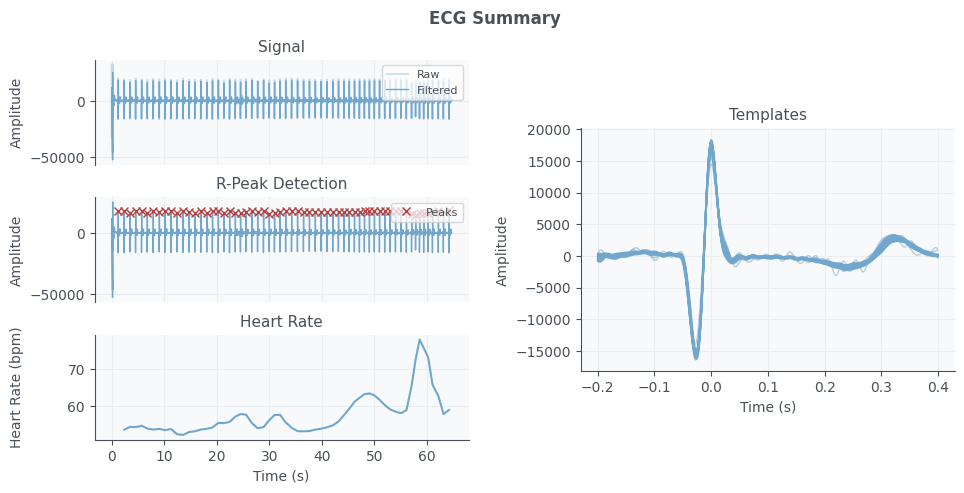

In [ ]:
from biosppy import storage
from biosppy.signals import ecg

# load raw ECG signal
signal, mdata = storage.load_txt('ecgsample.txt')

# process it and plot
out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)

In [ ]:
import biosppy.signals.emg as emg
import pandas as pd

dat = pd.read_csv("emg.csv")
dat1 = dat.emg1
dat2 = dat.emg2
fs = 1000

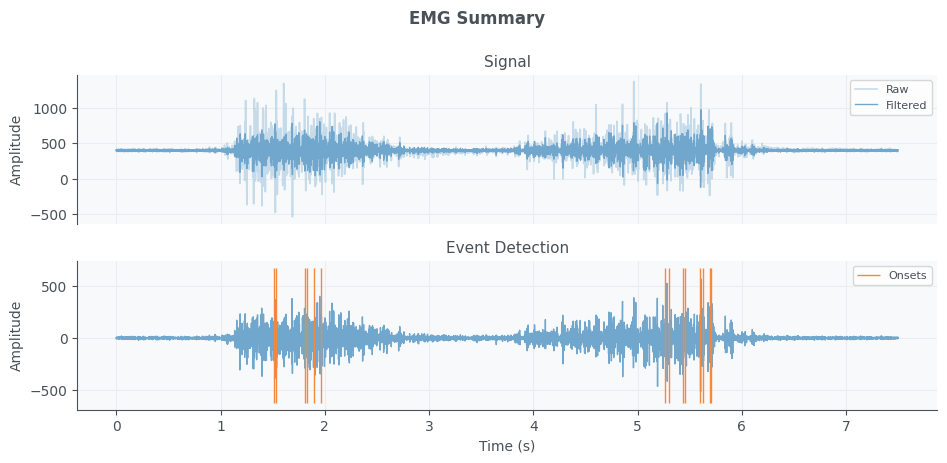

In [ ]:
ts, filterd, onsets = emg.emg(signal=dat1, sampling_rate=fs, show=True) #20~450Hz

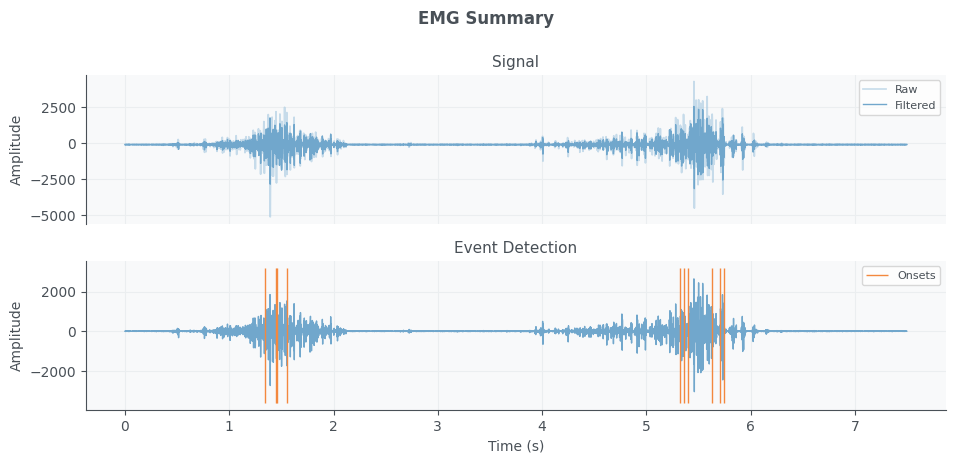

In [ ]:
ts, filterd, onsets = emg.emg(signal=dat2, sampling_rate=fs, show=True) #20~450Hz